<a href="https://colab.research.google.com/github/srishtidesai026/Ai-Voice-Assis/blob/main/RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and Cleansing Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/imu_left_hand.csv")
df

,time,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,euler_x,euler_y,euler_z,quaternion_w,quaternion_y,quaternion_x,quaternion_z
0,0.0,-0.101538,0.033590,-0.024359,-2.821795,0.328462,9.353590,3.980769,11.375000,-6.500000,326.766026,-16.761218,-2.032051,0.947064,0.145190,-0.024686,0.282242
1,1.0,-0.107497,0.030879,-0.034786,-3.992821,0.467424,8.882149,1.282280,5.710317,-2.221230,327.299985,-24.143620,-3.047390,0.936725,0.207899,-0.034819,0.274534
2,2.0,-0.103074,0.045568,-0.033306,-4.364728,0.534122,8.726357,0.582650,2.218185,-0.798646,326.316718,-26.496221,-3.522052,0.930497,0.227834,-0.039307,0.281362
3,3.0,-0.104768,0.041132,-0.029409,-4.550206,0.550457,8.643766,0.256903,1.770986,-0.544368,325.736968,-27.687403,-3.652791,0.927022,0.237569,-0.042621,0.285437
4,4.0,-0.098436,0.031644,-0.026617,-4.709971,0.566092,8.563242,0.066243,0.660155,-0.072275,325.559823,-28.735840,-3.798125,0.924586,0.246286,-0.044734,0.286299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,952.0,-0.043770,-0.036095,-0.012063,-1.883004,0.906145,9.574952,0.019997,0.124894,0.153924,353.966130,-11.064422,-5.407182,0.992836,0.099128,0.041646,0.052039
953,953.0,-0.065716,-0.035112,-0.017120,-1.912550,0.914911,9.568109,0.050750,0.262699,0.164008,353.813484,-11.244081,-5.463495,0.992590,0.100749,0.041853,0.053416
954,954.0,-0.082648,-0.034149,-0.020092,-1.944545,0.922859,9.560893,0.035203,-0.009275,0.099066,353.678289,-11.434440,-5.515619,0.992340,0.102488,0.041966,0.054615
955,955.0,-0.087610,-0.032393,-0.022558,-1.954970,0.922143,9.559060,-0.019923,-0.166558,0.101675,353.565379,-11.496454,-5.511564,0.992231,0.103060,0.041840,0.055590


In [3]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df[['linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x', 'gravity_y', 'gravity_z',
          'gyro_x', 'gyro_y', 'gyro_z', 'quaternion_w', 'quaternion_x', 'quaternion_y', 'quaternion_z']]
y = df[['euler_x', 'euler_y', 'euler_z']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,quaternion_w,quaternion_x,quaternion_y,quaternion_z
302,-0.056684,-0.047274,-0.009071,-2.689082,0.772102,9.392271,-0.064854,-0.036708,0.102789,0.951689,0.000525,0.144473,0.270874
467,0.111952,0.004742,0.040242,-3.352048,0.750000,9.178161,-0.016885,-0.130242,-0.044960,0.936926,-0.015837,0.177607,0.300628
294,-0.031198,-0.020399,-0.003053,-2.580829,0.810553,9.418036,0.056785,0.157775,0.119370,0.953462,0.004567,0.139591,0.267206
548,-0.057105,-0.065339,-0.005371,-2.672145,0.883226,9.385565,-0.056552,-0.074244,-0.035484,0.929324,-0.004315,0.145367,0.339428
465,0.086472,0.006354,0.036846,-3.362444,0.750323,9.174567,-0.001274,0.086016,0.056483,0.936890,-0.016018,0.178133,0.300393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.012395,-0.018597,0.005484,-2.417508,0.592968,9.478000,-0.067641,0.317288,0.095262,0.970868,0.004636,0.128222,0.202312
270,-0.045759,-0.002862,-0.008596,-2.575348,0.790000,9.420671,-0.048114,0.021634,0.026554,0.956685,0.004963,0.138897,0.255822
860,0.027917,-0.095835,-0.001146,-1.443682,1.025218,9.637203,0.217194,-1.317975,-0.609210,0.992780,0.046783,0.078025,0.077366
435,0.136181,-0.042159,0.043786,-2.905475,0.849683,9.318978,-0.006746,0.484833,0.253148,0.943165,-0.002361,0.156607,0.293066


In [4]:
X_test

,linaccel_x,linaccel_y,linaccel_z,gravity_x,gravity_y,gravity_z,gyro_x,gyro_y,gyro_z,quaternion_w,quaternion_x,quaternion_y,quaternion_z
835,-0.052512,-0.057140,-0.019228,-1.487270,0.949941,9.639887,0.051039,-0.744622,0.179880,0.992751,0.042799,0.080001,0.078498
477,0.103758,-0.032537,0.003410,-1.790114,1.016039,9.578323,0.081155,-0.426988,0.250309,0.943462,0.020653,0.103865,0.313825
350,-0.142492,-0.028411,-0.031669,-2.188919,0.894048,9.510637,0.091835,-0.930292,-0.310030,0.951812,0.012329,0.121170,0.281379
890,0.000067,-0.013993,-0.013672,-1.627057,0.975719,9.613451,-0.032152,0.238845,-0.202698,0.993065,0.044717,0.086706,0.065045
854,0.116871,-0.057097,0.011952,-1.832613,0.930226,9.582718,0.113962,-0.360988,0.188155,0.991194,0.040269,0.097726,0.079681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.098605,0.003197,0.039844,-3.374670,0.754658,9.169617,0.017857,0.316740,0.040369,0.936764,-0.016044,0.178825,0.300355
673,0.129979,-0.008586,0.038060,-2.711619,0.809330,9.384417,-0.034515,0.147944,-0.220774,0.988774,0.037658,0.141278,0.030516
33,0.007470,0.006461,0.016091,-3.931974,0.490638,8.956937,-0.279707,-0.315768,-0.024378,0.921411,-0.044547,0.202003,0.328557
31,-0.058726,0.021508,-0.017532,-3.787137,0.709839,9.008839,-0.238760,0.616028,-0.109073,0.922913,-0.030948,0.198531,0.328382


## Preparing Dataset for Neural Network (Training data)


In [5]:
# choose colums from training data
training_set = X_train.iloc[:,1:2].values

# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X_train)
training_set_scaled

array([[0.30691865, 0.24385537, 0.33015983, ..., 0.58230686, 0.46039444,
        0.75590117],
       [0.82473611, 0.3768892 , 0.66112392, ..., 0.44950749, 0.62845919,
        0.84748969],
       [0.38517629, 0.31259116, 0.37055364, ..., 0.61510938, 0.43563307,
        0.74461171],
       ...,
       [0.56669778, 0.11966003, 0.3833521 , ..., 0.95773291, 0.12336205,
        0.16025346],
       [0.89913517, 0.25693955, 0.68490835, ..., 0.55888115, 0.52194305,
        0.82421267],
       [0.62752241, 0.34452811, 0.49360732, ..., 0.61755722, 0.37617989,
        0.54457541]])

In [7]:
# create timesteps of 60 and 1 output
X_train=[]
y_train=[]
for i in range(60, training_set_scaled.shape[0]):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train), np.array(y_train)

# reshaping scaled dataset
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
X_train

array([[[0.30691865],
        [0.82473611],
        [0.38517629],
        ...,
        [0.63787341],
        [0.2463402 ],
        [0.47223862]],

       [[0.82473611],
        [0.38517629],
        [0.30562627],
        ...,
        [0.2463402 ],
        [0.47223862],
        [0.18668761]],

       [[0.38517629],
        [0.30562627],
        [0.74649854],
        ...,
        [0.47223862],
        [0.18668761],
        [0.34400034]],

       ...,

       [[0.58594065],
        [0.14067895],
        [0.41299928],
        ...,
        [0.57284539],
        [0.51903507],
        [0.34046535]],

       [[0.14067895],
        [0.41299928],
        [0.83043164],
        ...,
        [0.51903507],
        [0.34046535],
        [0.56669778]],

       [[0.41299928],
        [0.83043164],
        [0.34118615],
        ...,
        [0.34046535],
        [0.56669778],
        [0.89913517]]])

## Initialising and training RNN

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# initialise RNN
regressor = Sequential()

# adding layers to the model

# Layer 1
regressor.add(LSTM(units=10,return_sequences=True, input_shape=(X_train.shape[1],1)))
# dropping 20% of layers to avoid overtraining of data
regressor.add(Dropout(0.2))

# Layer 2
regressor.add(LSTM(units=10,return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 3
regressor.add(LSTM(units=10,return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 4
regressor.add(LSTM(units=10))
regressor.add(Dropout(0.2))

# output layer
regressor.add(Dense(units=1))

# compile model
regressor.compile(optimizer='adam',loss='mean_squared_error')

# train/fit model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.1822
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0838
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0719
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0731
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0740
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0706
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0766
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0718
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0685
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0737
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0685
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0684
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0712
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0678
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step 

## Using unscaled data (Test data) for testing Model

In [26]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df[['linaccel_x', 'linaccel_y', 'linaccel_z', 'gravity_x', 'gravity_y', 'gravity_z',
          'gyro_x', 'gyro_y', 'gyro_z', 'quaternion_w', 'quaternion_x', 'quaternion_y', 'quaternion_z']]
y = df[['euler_x', 'euler_y', 'euler_z']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Dataset
# choose colums from training data
training_set = X_train.iloc[:,1:2].values

from sklearn.preprocessing import MinMaxScaler

# feature scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X_train)

# create timesteps of 60 and 1 output
X_train=[]
y_train=[]
for i in range(60, training_set_scaled.shape[0]):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train), np.array(y_train)

# reshaping scaled dataset
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

# Test Dataset
# choose colums from test data
real_values = X_test.iloc[:,1:2].values

# Convert the NumPy array to a Pandas Series before concatenation
dataset_total = pd.concat([pd.Series(X_train[:,0,0]), X_test['linaccel_x']], axis=0)
inputs = dataset_total[len(dataset_total) - len(X_test) - 60:].values
inputs = inputs.reshape(-1,1)

sc_y = MinMaxScaler(feature_range=(0,1))
sc_y.fit(y_train.reshape(-1,1))
inputs = sc_y.transform(inputs)

X_test=[]

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_values = regressor.predict(X_test)
predicted_values = sc_y.inverse_transform(predicted_values)
predicted_values



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.4460941 ],
       [0.4465767 ],
       [0.44704986],
       [0.4475634 ],
       [0.44815195],
       [0.448815  ],
       [0.44954938],
       [0.4503332 ],
       [0.45114332],
       [0.45194277],
       [0.45270288],
       [0.45340967],
       [0.4540506 ],
       [0.45460945],
       [0.4550815 ],
       [0.45547342],
       [0.45579267],
       [0.4560519 ],
       [0.45624837],
       [0.45638543],
       [0.45647413],
       [0.4565248 ],
       [0.45654213],
       [0.45653462],
       [0.45652074],
       [0.45651323],
       [0.45651346],
       [0.45650887],
       [0.45648092],
       [0.4564113 ],
       [0.45629168],
       [0.4561181 ],
       [0.45589966],
       [0.45565844],
       [0.45540544],
       [0.4551601 ],
       [0.45494127],
       [0.45476407],
       [0.45463282],
       [0.45453575],
       [0.45447016],
       [0.45443738],
       [0.45442325],
       [0.4544062 ],
       [0.4543634 ],
       [0.45428142],
       [0.45415473],
       [0.453

## Plotting graph


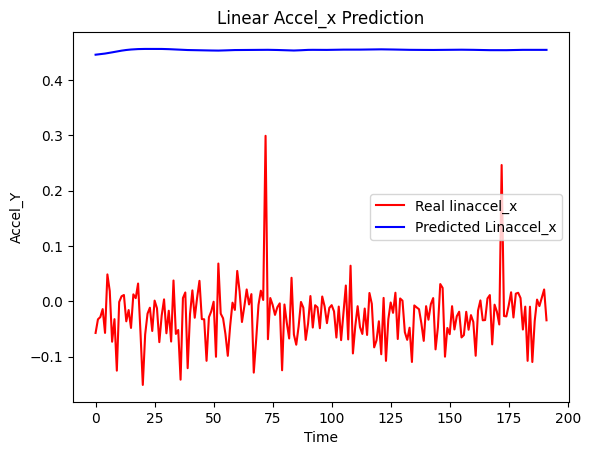

In [27]:
plt.plot(real_values, color='red', label='Real linaccel_x')
plt.plot(predicted_values, color = 'blue', label='Predicted Linaccel_x')
plt.title('Linear Accel_x Prediction')
plt.xlabel('Time')
plt.ylabel('Accel_Y')
plt.legend()
plt.show()

## Evaluation Of Model

# Regression task (Position, Orientation)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error

# calcuate regression values
mse = mean_squared_error(real_values, predicted_values)
r2 = r2_score(real_values, predicted_values)
mae = mean_absolute_error(real_values, predicted_values)
mape = mean_absolute_percentage_error(real_values, predicted_values)

print("Mean Squared Error", mse)
print("R2 score", r2)
print("Mean Absolute Error", mae)
print("Mean absolute percentage error", mape)


Mean Squared Error 0.23323677301493292
R2 score -89.89416834555186
Mean Absolute Error 0.4802757837696525
Mean absolute percentage error 41.09543391641095


Classification tasks are not supported in this dataset
This above dataset is a regression problem, as it has continuous data values